In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
# https://www.sleepfoundation.org/sleep-apnea/ahi

In [3]:
sleep_record_df = pd.read_csv('SLEEP_RECORD.csv')

In [4]:
sleep_record_df

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,SIZEBYTES,STREAMVIEWTYPE,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID,RECORD_ARCHIVE_IND
0,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-27,4.53,23223801940,2023-03-27T00:00:00.000Z,AutoSet,55,5,0,5,...,766,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-28T11:30:36.538Z,2023-03-28T17:31:07.252Z,NaN,5,N
1,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-01,7.38,23223801940,2023-05-01T00:00:00.000Z,AutoSet,80,5,0,5,...,412,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-02T17:37:55.351Z,2023-05-02T17:37:55.351Z,NaN,5,N
2,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-20,4.92,23223801940,2023-05-20T00:00:00.000Z,AutoSet,59,5,0,5,...,413,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-21T17:31:33.619Z,2023-05-21T17:31:33.619Z,NaN,5,N
3,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-06,3.65,23223801940,2023-05-06T00:00:00.000Z,AutoSet,45,4,0,4,...,766,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-07T11:30:32.375Z,2023-05-07T17:31:37.595Z,NaN,5,N
4,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-22,0.08,23223801940,2023-03-22T00:00:00.000Z,AutoSet,28,5,17,5,...,410,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-23T05:30:34.831Z,2023-03-23T11:30:34.116Z,NaN,5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-15,6.28,23223801940,2023-05-15T00:00:00.000Z,AutoSet,73,5,0,5,...,412,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-16T17:31:21.408Z,2023-05-16T17:31:21.408Z,NaN,5,N
120,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-04-06,5.28,23223801940,2023-04-06T00:00:00.000Z,AutoSet,63,5,0,5,...,414,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-04-07T17:31:23.793Z,2023-04-07T17:31:23.793Z,NaN,5,N
121,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-26,3.78,23223801940,2023-02-26T00:00:00.000Z,AutoSet,46,5,0,3,...,761,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-27T04:30:20.690Z,2023-02-27T22:30:27.150Z,NaN,5,N
122,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-15,4.52,23223801940,2023-03-15T00:00:00.000Z,AutoSet,60,5,5,5,...,414,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-16T11:30:37.007Z,2023-03-16T11:30:37.007Z,NaN,5,N


In [5]:
sleep_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PATIENT_ID                   124 non-null    object 
 1   SORT_KEY                     124 non-null    object 
 2   USAGE_HOURS                  124 non-null    float64
 3   FG_SERIAL_NO                 124 non-null    int64  
 4   SESSION_DATE                 124 non-null    object 
 5   MODE                         119 non-null    object 
 6   SLEEP_SCORE                  124 non-null    int64  
 7   AHI_SCORE                    124 non-null    int64  
 8   LEAK_SCORE                   124 non-null    int64  
 9   MASK_SCORE                   124 non-null    int64  
 10  USAGE_SCORE                  124 non-null    int64  
 11  MASK_SESSION_COUNT           124 non-null    int64  
 12  AHI                          119 non-null    float64
 13  LEAK_50_PERCENTILE  

In [6]:
print(sleep_record_df.apply(lambda col: col.unique()))

PATIENT_ID                                                [00uhdtmtv4WYdSYQ8297]
SORT_KEY                       [SLEEP_RECORD#2023-03-27, SLEEP_RECORD#2023-05...
USAGE_HOURS                    [4.53, 7.38, 4.92, 3.65, 0.08, 3.25, 4.57, 7.4...
FG_SERIAL_NO                                                       [23223801940]
SESSION_DATE                   [2023-03-27T00:00:00.000Z, 2023-05-01T00:00:00...
MODE                                                              [AutoSet, nan]
SLEEP_SCORE                    [55, 80, 59, 45, 28, 43, 61, 71, 29, 62, 20, 4...
AHI_SCORE                                                        [5, 4, 0, 2, 3]
LEAK_SCORE                            [0, 17, 5, 4, 20, 2, 7, 6, 8, 3, 9, 10, 1]
MASK_SCORE                                                          [5, 4, 0, 3]
USAGE_SCORE                    [45, 70, 49, 37, 1, 33, 46, 61, 19, 50, 0, 34,...
MASK_SESSION_COUNT                                               [2, 1, 3, 0, 4]
AHI                         

In [7]:
sleep_record_df['DateTime'] = pd.to_datetime(sleep_record_df['SESSION_DATE'])

In [8]:
print(type(sleep_record_df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
sleep_record_df['Date'] = pd.to_datetime(sleep_record_df['DateTime']).dt.date

In [10]:
sleep_record_df.head()

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID,RECORD_ARCHIVE_IND,DateTime,Date
0,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-27,4.53,23223801940,2023-03-27T00:00:00.000Z,AutoSet,55,5,0,5,...,N,NaN,NaN,2023-03-28T11:30:36.538Z,2023-03-28T17:31:07.252Z,NaN,5,N,2023-03-27 00:00:00+00:00,2023-03-27
1,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-01,7.38,23223801940,2023-05-01T00:00:00.000Z,AutoSet,80,5,0,5,...,N,NaN,NaN,2023-05-02T17:37:55.351Z,2023-05-02T17:37:55.351Z,NaN,5,N,2023-05-01 00:00:00+00:00,2023-05-01
2,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-20,4.92,23223801940,2023-05-20T00:00:00.000Z,AutoSet,59,5,0,5,...,N,NaN,NaN,2023-05-21T17:31:33.619Z,2023-05-21T17:31:33.619Z,NaN,5,N,2023-05-20 00:00:00+00:00,2023-05-20
3,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-06,3.65,23223801940,2023-05-06T00:00:00.000Z,AutoSet,45,4,0,4,...,N,NaN,NaN,2023-05-07T11:30:32.375Z,2023-05-07T17:31:37.595Z,NaN,5,N,2023-05-06 00:00:00+00:00,2023-05-06
4,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-22,0.08,23223801940,2023-03-22T00:00:00.000Z,AutoSet,28,5,17,5,...,N,NaN,NaN,2023-03-23T05:30:34.831Z,2023-03-23T11:30:34.116Z,NaN,5,N,2023-03-22 00:00:00+00:00,2023-03-22


In [11]:
sleep_record_df = sleep_record_df.sort_values(by='Date')

In [12]:
print(sleep_record_df.columns.values)

['PATIENT_ID' 'SORT_KEY' 'USAGE_HOURS' 'FG_SERIAL_NO' 'SESSION_DATE'
 'MODE' 'SLEEP_SCORE' 'AHI_SCORE' 'LEAK_SCORE' 'MASK_SCORE' 'USAGE_SCORE'
 'MASK_SESSION_COUNT' 'AHI' 'LEAK_50_PERCENTILE' 'LEAK_70_PERCENTILE'
 'LEAK_95_PERCENTILE' 'EXPIRATION_TIMESTAMP' 'EVENTID' 'EVENTNAME'
 'EVENTVERSION' 'EVENTSOURCE' 'AWSREGION' 'EVENTSOURCEARN'
 'APPROXIMATECREATIONDATETIME' 'SEQUENCENUMBER' 'SIZEBYTES'
 'STREAMVIEWTYPE' 'RECORD_DELETE_IND' 'DATA_LOAD_SOURCE'
 'DATA_UPDATE_SOURCE' 'DATA_LOAD_TIME' 'DATA_UPDATE_TIME' 'RECORD_MD5'
 'SOURCE_SYSTEM_ID' 'RECORD_ARCHIVE_IND' 'DateTime' 'Date']


In [13]:
sleep_record_df = sleep_record_df[sleep_record_df['MODE'] == 'AutoSet']

In [14]:
sleep_record_df

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID,RECORD_ARCHIVE_IND,DateTime,Date
101,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-23,4.92,23223801940,2023-02-23T00:00:00.000Z,AutoSet,60,5,2,4,...,N,NaN,NaN,2023-02-24T16:39:36.144Z,2023-02-24T16:39:36.144Z,NaN,5,N,2023-02-23 00:00:00+00:00,2023-02-23
68,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-24,7.52,23223801940,2023-02-24T00:00:00.000Z,AutoSet,79,5,0,4,...,N,NaN,NaN,2023-02-25T04:30:24.639Z,2023-02-25T22:30:26.354Z,NaN,5,N,2023-02-24 00:00:00+00:00,2023-02-24
81,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-25,8.13,23223801940,2023-02-25T00:00:00.000Z,AutoSet,80,5,0,5,...,N,NaN,NaN,2023-02-25T22:30:26.354Z,2023-02-26T16:30:35.434Z,NaN,5,N,2023-02-25 00:00:00+00:00,2023-02-25
121,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-26,3.78,23223801940,2023-02-26T00:00:00.000Z,AutoSet,46,5,0,3,...,N,NaN,NaN,2023-02-27T04:30:20.690Z,2023-02-27T22:30:27.150Z,NaN,5,N,2023-02-26 00:00:00+00:00,2023-02-26
48,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-27,5.58,23223801940,2023-02-27T00:00:00.000Z,AutoSet,64,3,0,5,...,N,NaN,NaN,2023-02-28T10:30:17.096Z,2023-02-28T16:30:46.765Z,NaN,5,N,2023-02-27 00:00:00+00:00,2023-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-06-22,6.32,23223801940,2023-06-22T00:00:00.000Z,AutoSet,73,5,0,5,...,N,NaN,NaN,2023-06-23T07:30:38.965Z,2023-06-23T08:30:39.276Z,NaN,5,N,2023-06-22 00:00:00+00:00,2023-06-22
92,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-06-23,5.12,23223801940,2023-06-23T00:00:00.000Z,AutoSet,61,5,0,5,...,N,NaN,NaN,2023-06-24T02:30:46.561Z,2023-06-24T09:30:47.339Z,NaN,5,N,2023-06-23 00:00:00+00:00,2023-06-23
88,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-06-24,5.70,23223801940,2023-06-24T00:00:00.000Z,AutoSet,67,5,0,5,...,N,NaN,NaN,2023-06-25T08:30:47.120Z,2023-06-25T09:33:13.135Z,NaN,5,N,2023-06-24 00:00:00+00:00,2023-06-24
95,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-06-25,4.15,23223801940,2023-06-25T00:00:00.000Z,AutoSet,52,5,0,5,...,N,NaN,NaN,2023-06-26T08:30:45.931Z,2023-06-26T09:30:40.882Z,NaN,5,N,2023-06-25 00:00:00+00:00,2023-06-25


In [15]:
rj_sleep = sleep_record_df[['Date','USAGE_HOURS', 'SLEEP_SCORE', 'AHI_SCORE', 'LEAK_SCORE',
                                           'MASK_SCORE', 'MASK_SESSION_COUNT', 'AHI', 'LEAK_50_PERCENTILE',
                                           'LEAK_70_PERCENTILE', 'LEAK_95_PERCENTILE']].reset_index(drop=True)

In [16]:
rj_sleep

,Date,USAGE_HOURS,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,MASK_SESSION_COUNT,AHI,LEAK_50_PERCENTILE,LEAK_70_PERCENTILE,LEAK_95_PERCENTILE
0,2023-02-23,4.92,60,5,2,4,3,4.6,36.0,39.6,50.4
1,2023-02-24,7.52,79,5,0,4,3,3.7,45.6,50.4,67.2
2,2023-02-25,8.13,80,5,0,5,2,2.2,69.6,78.0,106.8
3,2023-02-26,3.78,46,5,0,3,4,0.0,43.2,52.8,68.4
4,2023-02-27,5.58,64,3,0,5,2,11.1,36.0,40.8,66.0
...,...,...,...,...,...,...,...,...,...,...,...
114,2023-06-22,6.32,73,5,0,5,1,0.3,61.2,74.4,87.6
115,2023-06-23,5.12,61,5,0,5,2,3.9,58.8,67.2,84.0
116,2023-06-24,5.70,67,5,0,5,1,1.2,55.2,60.0,70.8
117,2023-06-25,4.15,52,5,0,5,1,1.4,61.2,66.0,69.6


In [17]:
print(rj_sleep['MASK_SESSION_COUNT'].value_counts())

1    85
2    20
3    10
4     4
Name: MASK_SESSION_COUNT, dtype: int64


In [18]:
# plt.rcParams["figure.figsize"] = [10, 3.5]
# plt.rcParams["figure.autolayout"] = True
# fig = plt.figure()
# x = rj_sleep['Date']
# y = rj_sleep['USAGE_HOURS']
# plt.plot(x,y)
# plt.xlabel("Date of Use")
# plt.ylabel("Hours of Use")
# plt.axhline(y=np.nanmean(rj_sleep['USAGE_HOURS']), color='red', linestyle = 'dotted', linewidth=3, label='Avg')
# spacing = 0.100
# fig.subplots_adjust(bottom=spacing)
# plt.show()

In [19]:
rj_sleep['Rolling 7 Day Average - Hours of Use'] = rj_sleep.USAGE_HOURS.rolling(7).mean()
rj_sleep['Rolling 30 Day Average - Hours of Use'] = rj_sleep.USAGE_HOURS.rolling(30).mean()
rj_sleep['Rolling 7 Day Average - AHI'] = rj_sleep.AHI.rolling(7).mean()
rj_sleep['Rolling 30 Day Average - AHI'] = rj_sleep.AHI.rolling(30).mean()

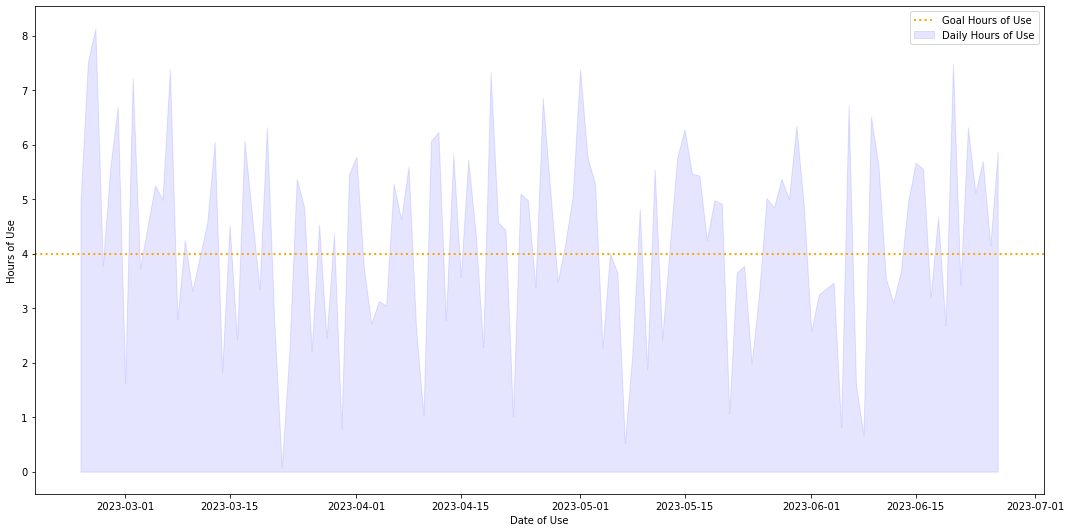

In [20]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']
plt.xlabel("Date of Use")
plt.ylabel("Hours of Use")
plt.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
# plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Rolling 7 Day Average',color='red' ,alpha=1)
# plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Rolling 30 Day Average',color='green' ,alpha=1)
plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

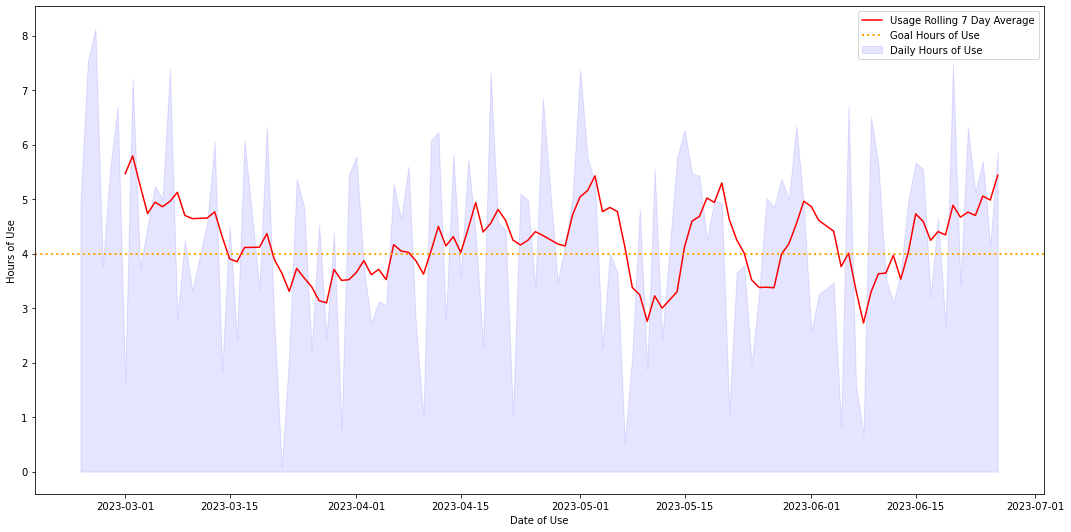

In [21]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']
plt.xlabel("Date of Use")
plt.ylabel("Hours of Use")
plt.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Usage Rolling 7 Day Average',color='red' ,alpha=1)
# plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Rolling 30 Day Average',color='green' ,alpha=1)
plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

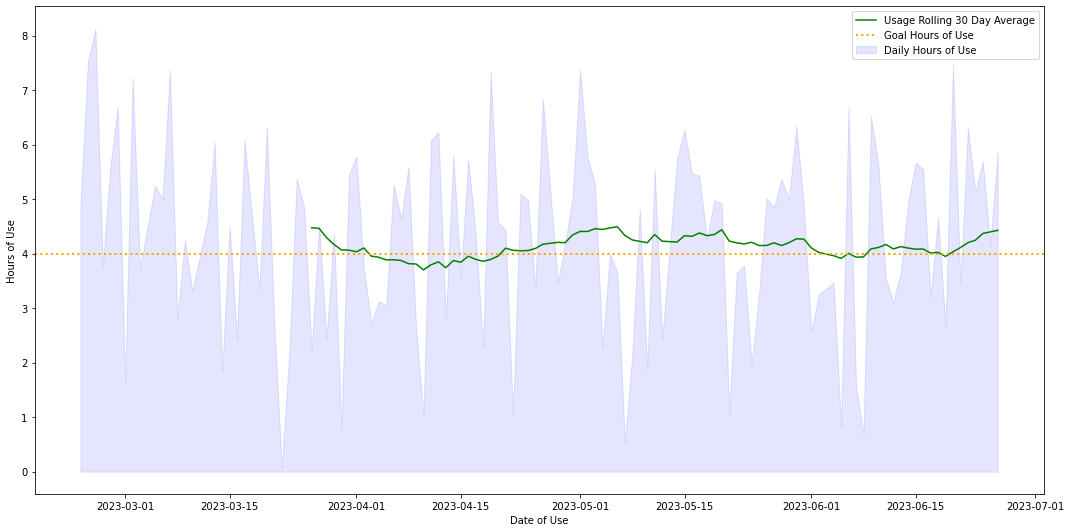

In [22]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']
plt.xlabel("Date of Use")
plt.ylabel("Hours of Use")
plt.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
# plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Rolling 7 Day Average',color='red' ,alpha=1)
plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Usage Rolling 30 Day Average',color='green' ,alpha=1)
plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

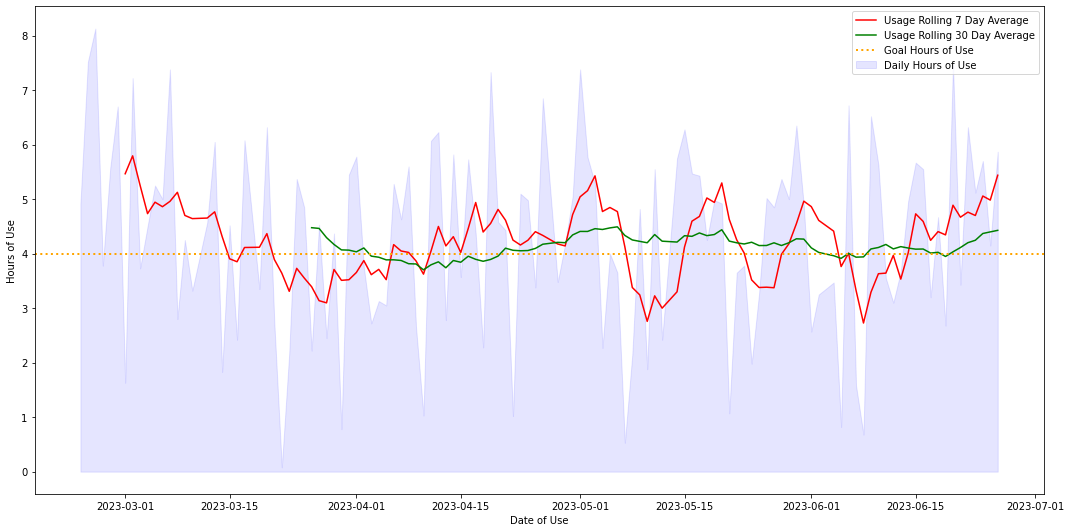

In [23]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']
plt.xlabel("Date of Use")
plt.ylabel("Hours of Use")
plt.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Usage Rolling 7 Day Average',color='red' ,alpha=1)
plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Usage Rolling 30 Day Average',color='green' ,alpha=1)
plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

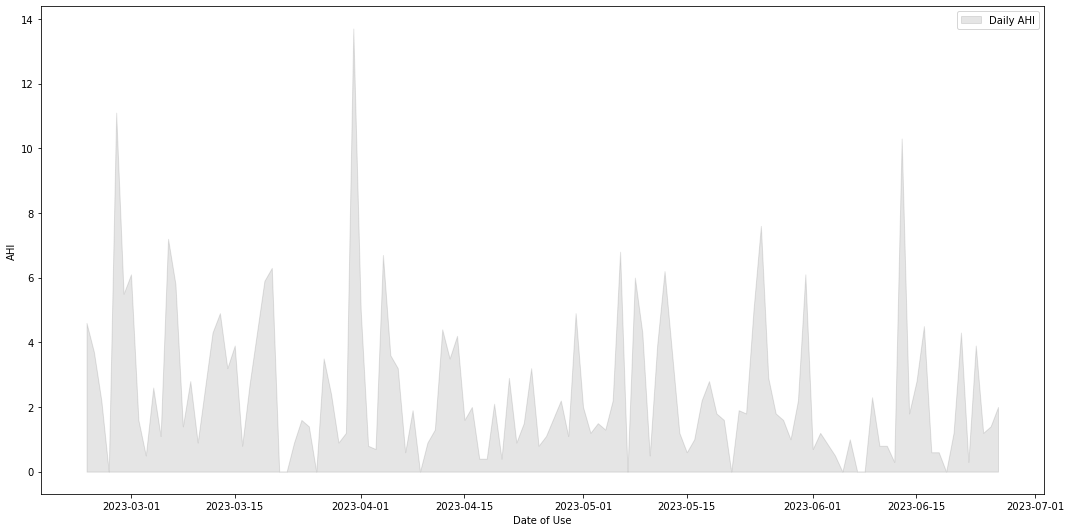

In [24]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['AHI']
# plt.plot(x,y)
plt.xlabel("Date of Use")
plt.ylabel("AHI")
# plt.plot(x, y, label='AHI', color='black')
plt.fill_between(x, y, label = "Daily AHI",color = "black", alpha=0.1)
# plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Rolling 7 Day Average',color='red' ,alpha=1)
# plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Rolling 30 Day Average',color='green' ,alpha=1)
# plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

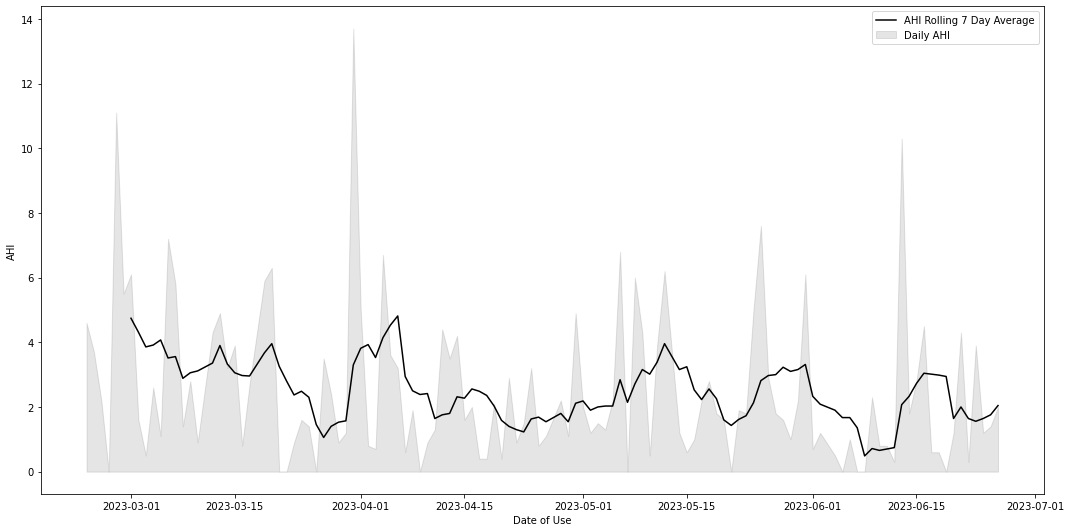

In [25]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['AHI']
# plt.plot(x,y)
plt.xlabel("Date of Use")
plt.ylabel("AHI")
# plt.plot(x, y, label='AHI', color='black')
plt.fill_between(x, y, label = "Daily AHI",color = "black", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 7 Day Average - AHI'], label = 'AHI Rolling 7 Day Average',color='black' ,alpha=1)

plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

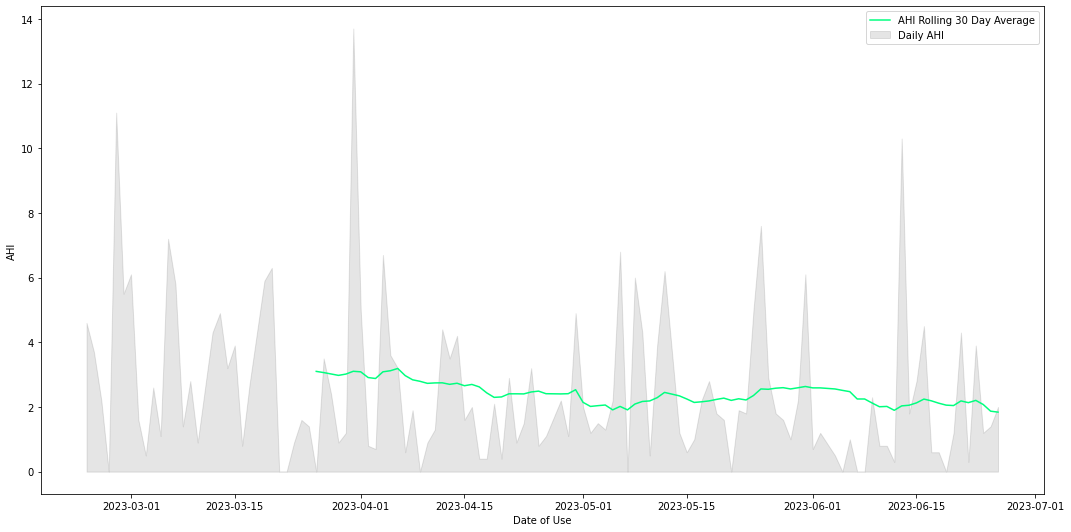

In [26]:

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['AHI']
# plt.plot(x,y)
plt.xlabel("Date of Use")
plt.ylabel("AHI")
# plt.plot(x, y, label='AHI', color='black')
plt.fill_between(x, y, label = "Daily AHI",color = "black", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 30 Day Average - AHI'], label = 'AHI Rolling 30 Day Average',color='springgreen' ,alpha=1)
# plt.plot(x, rj_sleep['Rolling 7 Day Average - AHI'], label = 'AHI Rolling 7 Day Average',color='orangered' ,alpha=1)

plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

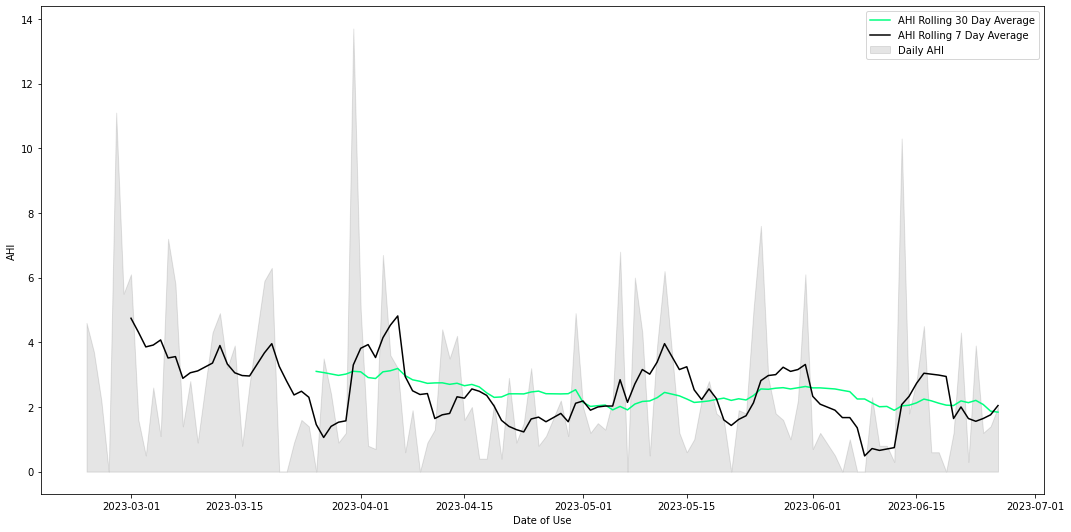

In [27]:

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['AHI']
# plt.plot(x,y)
plt.xlabel("Date of Use")
plt.ylabel("AHI")
# plt.plot(x, y, label='AHI', color='black')
plt.fill_between(x, y, label = "Daily AHI",color = "black", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 30 Day Average - AHI'], label = 'AHI Rolling 30 Day Average',color='springgreen' ,alpha=1)
plt.plot(x, rj_sleep['Rolling 7 Day Average - AHI'], label = 'AHI Rolling 7 Day Average',color='black' ,alpha=1)

plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

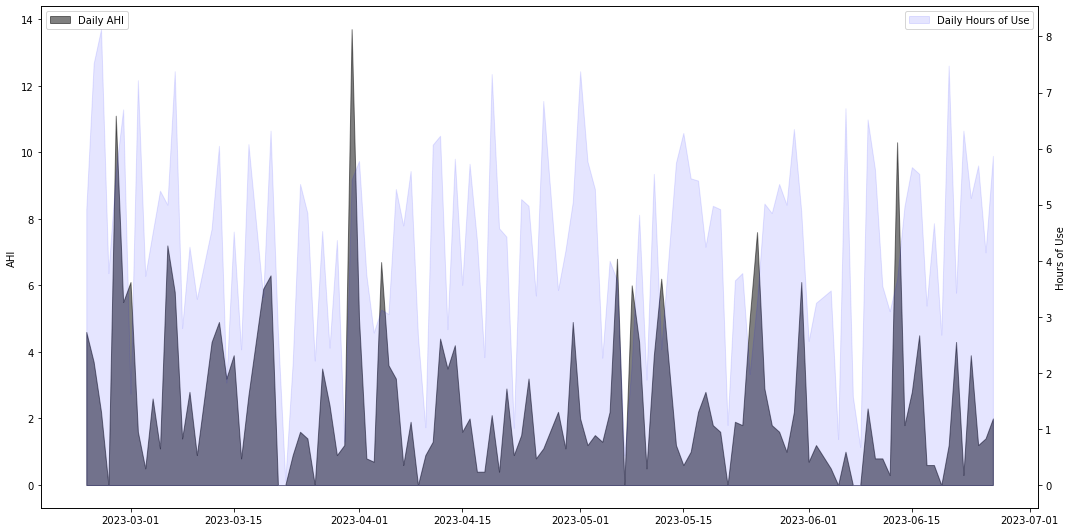

In [28]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True


fig, ax1 = plt.subplots()

x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']


ax1.set_ylabel('AHI')
ax1.fill_between(x, rj_sleep['AHI'], label = "Daily AHI",color = "black", alpha=.5)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
ax2.set_ylabel("Hours of Use")
ax2.legend(loc='upper right')

spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

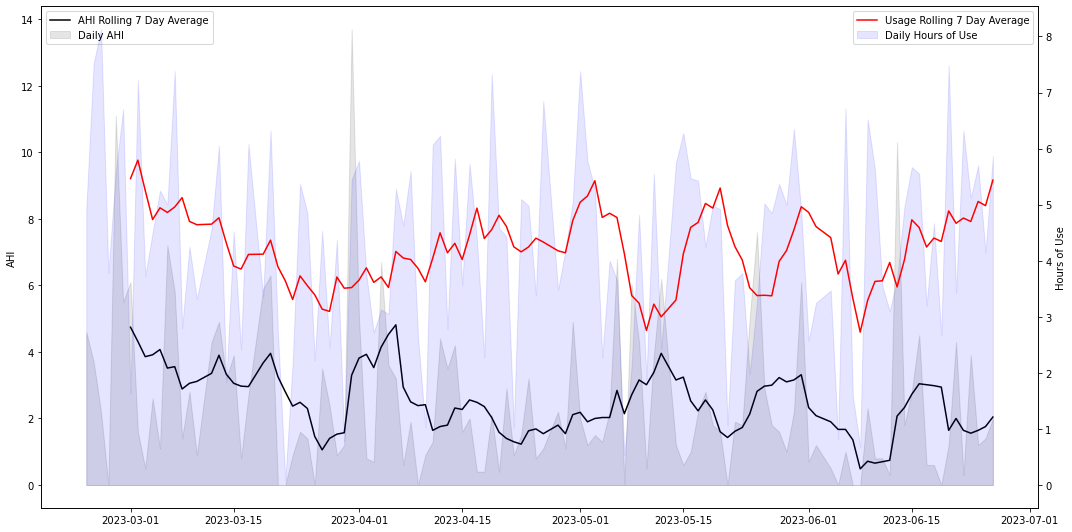

In [29]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True


fig, ax1 = plt.subplots()

x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']


ax1.set_ylabel('AHI')
ax1.fill_between(x, rj_sleep['AHI'], label = "Daily AHI",color = "black", alpha=.1)
ax1.plot(x, rj_sleep['Rolling 7 Day Average - AHI'], label = 'AHI Rolling 7 Day Average',color='black' ,alpha=1)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
ax2.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Usage Rolling 7 Day Average',color='red' ,alpha=1)
ax2.set_ylabel("Hours of Use")
ax2.legend(loc='upper right')

spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

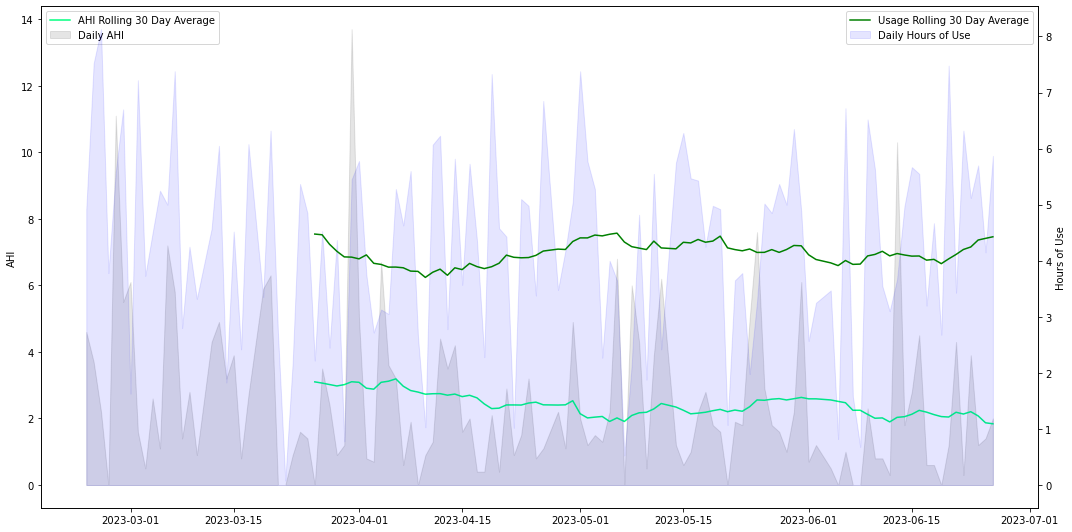

In [30]:
plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True


fig, ax1 = plt.subplots()

x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']


ax1.set_ylabel('AHI')
ax1.fill_between(x, rj_sleep['AHI'], label = "Daily AHI",color = "black", alpha=.1)
ax1.plot(x, rj_sleep['Rolling 30 Day Average - AHI'], label = 'AHI Rolling 30 Day Average',color='springgreen' ,alpha=1)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
ax2.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Usage Rolling 30 Day Average',color='green' ,alpha=1)
ax2.set_ylabel("Hours of Use")
ax2.legend(loc='upper right')

spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()